<a href="https://colab.research.google.com/github/Nandani01/Student-Placement-Prediction-Using-ML/blob/main/1_placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Placement


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


## 1 Preprocess data

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


## 2 EDA

In [ ]:
import matplotlib.pyplot as plt

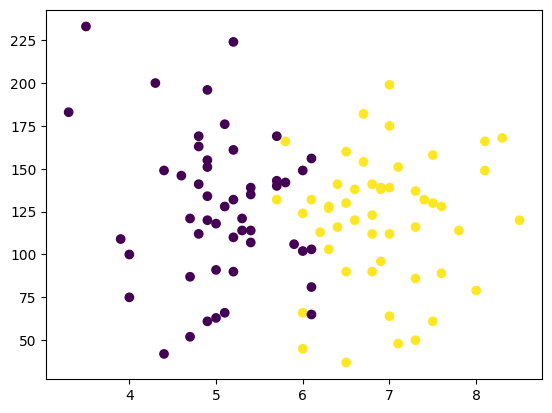

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

## Barplot



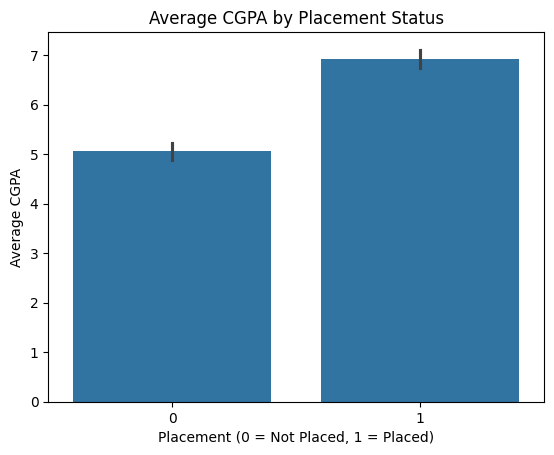

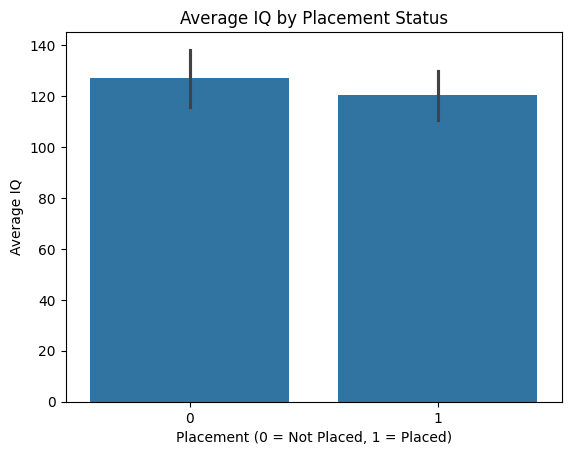

In [ ]:
import seaborn as sns

sns.barplot(x='placement', y='cgpa', data=df)
plt.title('Average CGPA by Placement Status')
plt.xlabel('Placement (0 = Not Placed, 1 = Placed)')
plt.ylabel('Average CGPA')
plt.show()

sns.barplot(x='placement', y='iq', data=df)
plt.title('Average IQ by Placement Status')
plt.xlabel('Placement (0 = Not Placed, 1 = Placed)')
plt.ylabel('Average IQ')
plt.show()



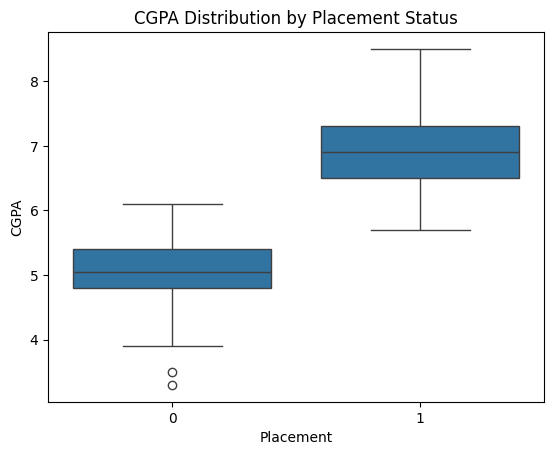

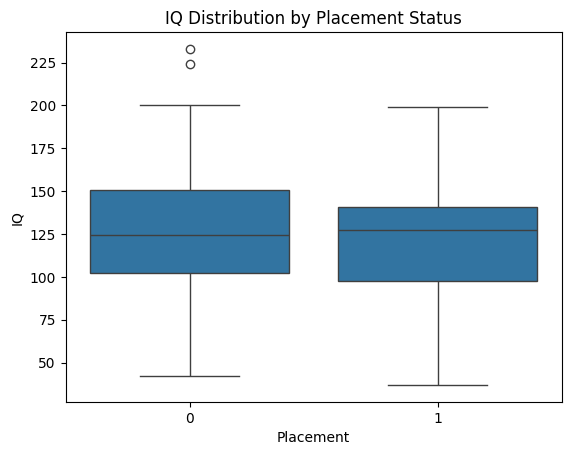

In [ ]:
#Boxplot
sns.boxplot(x='placement', y='cgpa', data=df)
plt.title('CGPA Distribution by Placement Status')
plt.xlabel('Placement')
plt.ylabel('CGPA')
plt.show()

sns.boxplot(x='placement', y='iq', data=df)
plt.title('IQ Distribution by Placement Status')
plt.xlabel('Placement')
plt.ylabel('IQ')
plt.show()


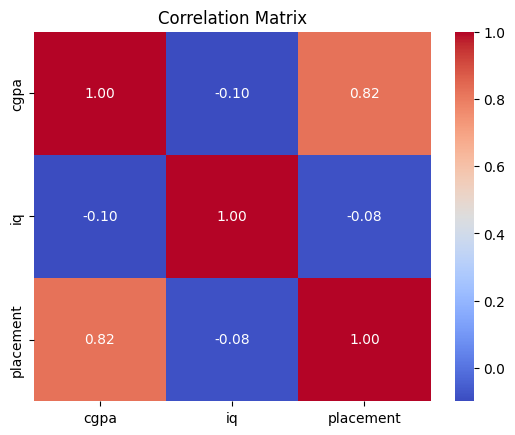

In [ ]:
#heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## 3 Extract input and output values
**bold text**

In [ ]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
x


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

## 3 scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

## 4 Train the split

In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_train

array([[ 2.25011251e+00, -9.88603052e-02],
       [-9.90049504e-01, -1.66586992e+00],
       [-2.70013501e-01,  5.12007849e-01],
       [ 3.60018001e-01,  4.58888879e-01],
       [ 5.40027002e-01, -9.88603052e-02],
       [-5.40027002e-01, -2.58217215e-01],
       [-8.10040503e-01,  1.38847085e+00],
       [ 1.89009451e+00,  6.71364759e-01],
       [-7.20036003e-01, -3.64455155e-01],
       [ 9.00045003e-01,  1.36191137e+00],
       [ 9.00045003e-01, -3.11336185e-01],
       [-7.20036003e-01,  9.90078579e-01],
       [ 4.50022502e-01, -2.30329756e+00],
       [ 1.17005850e+00, -2.05098245e-01],
       [-5.40027002e-01,  4.05769909e-01],
       [-1.26006300e+00,  5.91686304e-01],
       [-5.40027002e-01, -4.44133610e-01],
       [ 7.20036003e-01, -3.11336185e-01],
       [-6.30031502e-01, -2.58217215e-01],
       [ 9.00045003e-02,  8.57281154e-01],
       [-2.70013501e-01,  4.32329394e-01],
       [ 1.89009451e+00,  1.12287600e+00],
       [ 7.20036003e-01, -1.91818503e-02],
       [-1.

In [ ]:
x_test = scaler.transform(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
x_test

array([[  7.6,  89. ],
       [  5.2,  90. ],
       [  6. , 124. ],
       [  4.4,  42. ],
       [  7.8, 114. ],
       [  6.5, 160. ],
       [  6. , 149. ],
       [  5.2, 224. ],
       [  3.3, 183. ],
       [  7.1,  48. ]])

## 5 Model training

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
clf.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
y_test

,placement
42,1
28,0
27,1
96,0
55,1
38,1
33,0
16,0
17,0
5,1


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.5

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

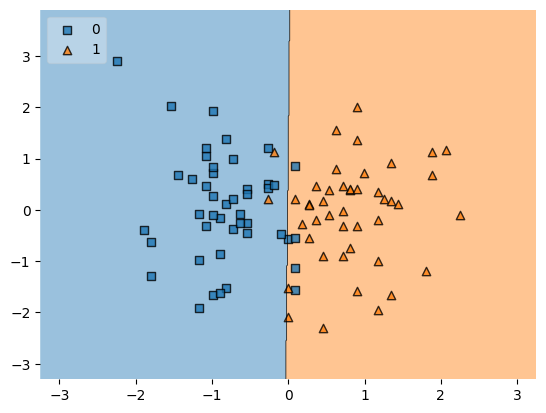

In [ ]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))